# Introduction


Music is a ubiquitous part of our lives. Regardless of where or who you are, you have been a willing or unwilling consumer of music numerous times in your life. For some, music is tied to identity; what genres you listen to may define your social group and economic standing in society. For others, music is an enhancing additive to other aspects of life such as exercising, performing chores, or partaking in religious rituals. So pervasive is it within our psyche that sociologists and anthropologists consider music to be a cultural universal alongside other concepts such as language and logical notions.

Equally, music production is an activity that is older than recorded history. The oldest evidence of a musical instrument is the Divje Babe flute which is believed to be at least 50,000 years old. Similarly, the oldest evidence we have of musical notation is the Hurrian Hymn to Nikkal which is dated to around 1400 BCE.

<img src="https://assets.classicfm.com/2016/35/musical-score-from-ugarit-clay-tablet-from-ugarit-with-the-hurrian-hymn-13th-cent-bc-1472635579.jpg">

<center><i>The cuneiform tablet on which the musical notation for the Hurrian Hymn to Nikkal was written</i></center>

Our connection and interaction with music as a species has remained strong throughout the ages. However, with the advent of new technologies such as the radio, television, and personal computers, the way we consume and produce music has drastically changed. Not only do we have more readily available access to music as consumers, but music production has boomed as digital audio workstations (DAWs) have allowed for increased ease in the composition of songs. 

<img src="https://www.sae.edu/nld/wp-content/uploads/sites/21/2021/08/L1090644-min-2232x1256.jpg">

<center><i>A music producer utilizing a DAW, midi keyboard, and table-top electronic drum kit to produce music</i></center>

As such, there arose a need to be able to efficiently connect music consumers with music producers based on preferences. With the increase in genres and subgenres of music, these preferences are increasingly hard to identify but the fields of artificial intelligence and machine learning have presented us with several ways this can be done. For our project, we will be focusing on identifying user music preferences using different data points.

Within our group, there is little experience with music. Hisham is a beginner oud and hand percussion instrument player. Jorge has experience with music production with experience in audio engineering. Lili is a music enthusiast.

# Data

The dataset that we will be using will come from several different places; three datasets will come from Twitter and display 11.6 million music listening events of 139K users and 346K tracks. Another dataset will come from Spotify and will cover 125 different genres. Information from these datsets will include both user information such as which users listened to which tracks but also information related to similarity metrics such as danceability and loudness.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#creating dataframes from CSVs regarding information from Twitter
#we will display statistical information for all the quantitative variables that we pull to gain a holistic understanding of the datasets
#we will also display information related to the null variables in each column

#only pulling columns 0 to 22 for cont_df as the remaining columns need more investigation
cont_df = pd.read_csv('context_content_features.csv', usecols=range(0, 22))
sent_df = pd.read_csv('sentiment_values.csv', index_col = False)
utht_df = pd.read_csv('user_track_hashtag_timestamp.csv')

C:\Users\fbmd1067\AppData\Local\Temp\ipykernel_2968\3782684915.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  sent_df = pd.read_csv('sentiment_values.csv', index_col = False)


In [3]:
cont_df.head()

,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,...,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id
0,NaN,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,...,b2980c722a1ace7a30303718ce5491d8,NaN,NaN,en,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en,Central Time (US & Canada),8.149694e+07,418243774842929150
1,NaN,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,...,5cddcd0e314e2f2223ab21937d2c8778,NaN,NaN,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2.205687e+09,418243779137896450
2,NaN,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,...,e41273f43af504714d85465294f1f369,NaN,NaN,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),1.325884e+08,418243779951198200
3,NaN,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,...,557ce373bd29743eb00a3723ab19ebe8,NaN,NaN,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),9.767522e+07,418243788004687900
4,NaN,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,...,77bd64b4bf77e10001fd02964985ae0f,NaN,NaN,en,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en,Central Time (US & Canada),1.794569e+07,418243789753700350


In [4]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614671 entries, 0 to 11614670
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   coordinates       object 
 1   instrumentalness  float64
 2   liveness          float64
 3   speechiness       float64
 4   danceability      float64
 5   valence           float64
 6   loudness          float64
 7   tempo             float64
 8   acousticness      float64
 9   energy            float64
 10  mode              float64
 11  key               float64
 12  artist_id         object 
 13  place             object 
 14  geo               object 
 15  tweet_lang        object 
 16  track_id          object 
 17  created_at        object 
 18  lang              object 
 19  time_zone         object 
 20  user_id           float64
 21  id                int64  
dtypes: float64(12), int64(1), object(9)
memory usage: 1.9+ GB


In [6]:
cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instrumentalness,11611869.0,9.644051e-02,2.386454e-01,0.00000,0.000000e+00,5.560000e-05,1.050000e-02,9.990000e-01
liveness,11611757.0,1.914839e-01,1.597695e-01,0.00673,9.280000e-02,1.280000e-01,2.490000e-01,1.000000e+00
speechiness,11610783.0,6.556934e-02,6.499443e-02,0.02160,3.310000e-02,4.280000e-02,6.740000e-02,9.650000e-01
danceability,11610783.0,5.579694e-01,1.580563e-01,0.03710,4.540000e-01,5.640000e-01,6.720000e-01,9.920000e-01
valence,11609883.0,5.165480e-01,2.478292e-01,0.00001,3.200000e-01,5.130000e-01,7.200000e-01,1.000000e+00
loudness,11614671.0,-7.687357e+00,3.846243e+00,-60.00000,-9.643000e+00,-6.815000e+00,-4.968000e+00,3.651000e+00
tempo,11614671.0,1.228318e+02,2.830076e+01,0.00000,1.013660e+02,1.213080e+02,1.399200e+02,2.459410e+02
acousticness,11611884.0,2.085219e-01,2.690199e-01,0.00000,8.210000e-03,7.540000e-02,3.210000e-01,9.960000e-01
energy,11611910.0,6.815607e-01,2.150572e-01,0.00002,5.410000e-01,7.200000e-01,8.550000e-01,1.000000e+00
mode,11611957.0,6.738325e-01,4.688094e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
cont_df.describe(include=[object]).T

,count,unique,top,freq
coordinates,38058,9811,"{u'type': u'Point', u'coordinates': [13.119993...",14328
artist_id,11614671,44213,9fef94eece5aa762753f0beef2508bde,60560
place,44344,3681,"{u'name': u'Potsdam', u'url': u'https://api.tw...",5731
geo,38058,9811,"{u'type': u'Point', u'coordinates': [52.381905...",14328
tweet_lang,11614671,46,en,10407599
track_id,11614671,346700,3d02f9fcad37e6bb227682761039498c,31048
created_at,11614671,9085111,en,201
lang,11614607,88,en,8812468
time_zone,8353946,204,Eastern Time (US & Canada),2169410


In [5]:
cont_isna = cont_df.isna().sum().sort_values(ascending=False)/len(cont_df)
print('col_count:',cont_isna.count())

df_data = pd.DataFrame([cont_isna])
df_data.T[0:]

col_count: 22


,0
coordinates,0.996723
geo,0.996723
place,0.996182
time_zone,0.280742
user_id,0.003818
valence,0.000412
speechiness,0.000335
danceability,0.000335
liveness,0.000251
instrumentalness,0.000241


In [81]:
#Different time zones in dataset
a = cont_df['time_zone'].value_counts(normalize=True).to_frame()                #.index
a[150:205]

,time_zone
Kamchatka,4.788156e-06
Kolkata,4.668452e-06
America/Santiago,4.548749e-06
America/Asuncion,4.429045e-06
Asia/Colombo,3.710821e-06
America/Sao_Paulo,3.351709e-06
Asia/Kuala_Lumpur,3.232006e-06
Asia/Shanghai,3.232006e-06
Darwin,2.513782e-06
America/Denver,2.513782e-06


In [70]:
#cont_df.groupby(['time_zone', 'lang', 'tweet_lang']).agg('count').head(50)


In [69]:
#Different languages in dataset
cont_df['lang'].value_counts().index

#cont_df[cont_df['lang'] == 'West Central Africa']

#https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes
#all other languages could be erased

Index(['en', 'es', 'ja', 'en-gb', 'nl', 'fr', 'pt', 'de', 'it', 'id', 'tr',
       'ru', 'ko', 'sv', 'ar', 'ca', 'pl', 'el', 'fi', 'gl', 'th', 'xx-lc',
       'no', 'cs', 'uk', 'da', 'zh-tw', 'hu', 'eu', 'zh-cn', 'ro', 'msa', 'fa',
       'en-GB', 'Bangkok', 'es-MX', 'fil', 'Quito', 'he', 'Lima', 'pt-PT',
       'Kuala Lumpur', 'Central Time (US & Canada)',
       'Eastern Time (US & Canada)', 'Mumbai', 'Taipei', 'Chennai', 'Beijing',
       'Mountain Time (US & Canada)', 'Hong Kong',
       'Pacific Time (US & Canada)', 'Jakarta', 'zh-Hans', 'Riyadh',
       'Canberra', 'Jerusalem', 'Istanbul', 'Astana', 'London', 'Mexico City',
       'Hawaii', 'Tokyo', 'zh-CN', 'Bogota', 'Sydney', 'sr', 'Seoul',
       'Caracas', 'Melbourne', 'Atlantic Time (Canada)', 'Greenland',
       'International Date Line West', 'vi', 'Abu Dhabi', 'Berlin',
       'Casablanca', 'La Paz', 'Athens', 'West Central Africa', 'Cairo',
       'Tehran', 'Baghdad', 'Kuwait', 'Kathmandu', 'Osaka', 'bg', 'Singapore',
  

In [82]:
#cont_df.groupby(['time_zone', 'lang']).count()

In [37]:
cont_df['tweet_lang'].value_counts().index

Index(['en', 'es', 'et', 'ja', 'in', 'de', 'it', 'sk', 'fr', 'ht', 'pt', 'tl',
       'pl', 'nl', 'cy', 'no', 'ro', 'fi', 'da', 'sv', 'id', 'sl', 'tr', 'bs',
       'hu', 'zh', 'lt', 'is', 'vi', 'hr', 'ru', 'ko', 'lv', 'bg', 'fa', 'und',
       'uk', 'el', 'th', 'ar', 'sr', 'iw', 'ur', 'he', 'hy', 'ka'],
      dtype='object')

In [11]:
sent_df.head()

,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,ol_max,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,0.7375,0.7375,0.7375,NaN,NaN,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,0.9000,0.9000,0.9000,1.0,1.0,1.0,1.0
2,greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,0.8875,0.8875,0.8875,1.0,1.0,1.0,1.0
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [26]:
sent_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5290 entries, ('relaxtime', 0.8, 0.8, 2.4000000000000004) to ('moderncountry', nan, nan, nan)
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      3867 non-null   float64
 1    vader_min   255 non-null    float64
 2    vader_max   255 non-null    float64
 3    vader_sum   255 non-null    float64
 4   vader_avg    255 non-null    float64
 5     afinn_min  2635 non-null   float64
 6    afinn_max   2635 non-null   float64
 7    afinn_sum   2635 non-null   float64
 8    afinn_avg   2635 non-null   float64
 9    ol_min      2823 non-null   float64
 10   ol_max      2823 non-null   float64
 11   ol_sum      2823 non-null   float64
 12   ol_avg      2823 non-null   float64
 13   ss_min      2160 non-null   float64
 14   ss_max      2160 non-null   float64
 15   ss_sum      2160 non-null   float64
 16   ss_avg      2160 non-null   float64
dtypes: float64(17)
memor

In [31]:
sent_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hashtag,3867.0,0.503563,0.236347,0.1000,0.3000,0.6000,0.7000,1.00
vader_min,255.0,0.745098,0.436663,0.0000,0.0000,1.0000,1.0000,1.00
vader_max,255.0,0.752941,0.432149,0.0000,1.0000,1.0000,1.0000,1.00
vader_sum,255.0,0.858824,0.648796,0.0000,1.0000,1.0000,1.0000,3.00
vader_avg,255.0,0.749020,0.432158,0.0000,0.5000,1.0000,1.0000,1.00
afinn_min,2635.0,0.523107,0.262607,0.0375,0.2875,0.6125,0.7375,0.90
afinn_max,2635.0,0.544905,0.260557,0.0375,0.3125,0.6500,0.7375,0.90
afinn_sum,2635.0,0.760550,0.535178,0.0375,0.3500,0.6875,0.9000,2.85
afinn_avg,2635.0,0.534016,0.256876,0.0375,0.3000,0.6125,0.7375,0.90
ol_min,2823.0,0.451647,0.497745,0.0000,0.0000,0.0000,1.0000,1.00


In [47]:
sent_isna = sent_df.isna().sum().sort_values(ascending=False)/len(sent_df)
print('col_count:',sent_isna.count())

df_data = pd.DataFrame([sent_isna])
df_data.T[0:]

col_count: 17


,0
vader_min,0.951796
vader_max,0.951796
vader_sum,0.951796
vader_avg,0.951796
ss_avg,0.591682
ss_max,0.591682
ss_min,0.591682
ss_sum,0.591682
afinn_max,0.501890
afinn_min,0.501890


In [91]:
sent_df['hashtag'].value_counts().to_frame()         # .index

,hashtag
relaxtime,1
nevertrustabigbuttandasmile,1
thrash,1
nowthrashing,1
enjoythemode,1
...,...
queagustomesiento,1
thegreatesthits,1
muchangrysogrowl,1
classicsong,1


In [16]:
utht_df.head()

,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 05:54:21
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 05:54:21
4,2205686924,da3110a77b724072b08f231c9d6f7534,NowPlaying,2014-01-01 05:54:22


In [27]:
utht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560113 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   track_id    object
 2   hashtag     object
 3   created_at  object
dtypes: int64(1), object(3)
memory usage: 535.9+ MB


In [32]:
utht_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,17560113.0,8.857594e+08,8.578935e+08,939.0,163605478.0,531451640.0,1.480383e+09,2.937225e+09


In [36]:
utht_df.describe(include=[object]).T

,count,unique,top,freq
track_id,17560113,344536,e24deb4963769d25e2c03ad9bf58a028,82551
hashtag,17560112,49912,nowplaying,5765350
created_at,17560113,8743896,2014-07-13 11:18:51,70


In [48]:
utht_isna = utht_df.isna().sum().sort_values(ascending=False)/len(utht_df)
print('col_count:',utht_isna.count())

df_data = pd.DataFrame([utht_isna])
df_data.T[0:]

col_count: 4


,0
hashtag,5.694724e-08
created_at,0.000000e+00
track_id,0.000000e+00
user_id,0.000000e+00


In [92]:
utht_df['hashtag'].value_counts().to_frame()   

,hashtag
nowplaying,5765350
NowPlaying,4954325
listenlive,2740670
nowPlaying,156403
Nowplaying,124702
...,...
4añossinCerati,1
EstaEsMúsicaNoMamadas,1
jodidos,1
FreshAndNews,1


In [94]:
#creating a dataframe from the CSV regarding information from Spotify
tracks_df = pd.read_csv('dataset.csv')
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [28]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [38]:
tracks_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [39]:
tracks_df.describe(include=[object])

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,rock
freq,9,279,195,151,1000


In [49]:
tracks_isna = tracks_df.isna().sum().sort_values(ascending=False)/len(tracks_df)
print('col_count:',tracks_isna.count())

df_data = pd.DataFrame([tracks_isna])
df_data.T[0:]

col_count: 21


,0
artists,0.000009
album_name,0.000009
track_name,0.000009
track_genre,0.000000
energy,0.000000
track_id,0.000000
popularity,0.000000
duration_ms,0.000000
explicit,0.000000
danceability,0.000000


In [113]:
tracks_df.groupby(['artists', 'album_name']).agg('track_name').value_counts(ascending = False).to_frame().head(50)




#cont_df.groupby(['time_zone', 'lang', 'tweet_lang']).agg('count').head(50)

track_name
artists                                            album_name                               track_name                                                    
!nvite                                             pagadoff                                 pagadoff                                                     1
                                                   strolling                                strolling                                                    1
"Puppy Dog Pals" Cast                              Puppy Dog Pals: Disney Junior Music      Going on a Mission                                           1
                                                                                            Puppy Dog Pals Main Title Theme                              1
"Weird Al" Yankovic                                "Weird Al" Yankovic                      Gotta Boogie                                                 1
                                                                                            I'll Be Mellow When I'm Dead                                 1
                                                                                            Such a Groovy Guy                                            1
                                                                                            The Check's In the Mail                                      1
                                                   Bad Hair Day                             Amish Paradise (Parody of "Gangsta's Paradise" ...           1
                                                   In 3-D                                   King of Suede                                                1
                                                   Polka Party                              Good Enough for Now                                          1
                                                   Poodle Hat                               Genius In France                                             1
                                                   Running With Scissors                    Grapefruit Diet (Parody of "Zoot Suit Riot" by ...           1
                                                   The Essential "Weird Al" Yankovic        Gump (Parody of "Lump" by The Presidents of the...           1
                                                                                            Since You've Been Gone                                       1
                                                                                            The Biggest Ball of Twine In Minnesota                       1
                                                                                            The Night Santa Went Crazy                                   1
                                                                                            Trapped In the Drive-Thru (Parody of "Trapped I...           1
                                                   UHF: "Weird Al" Yankovic                 Spatula City                                                 1
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs Nursery Rhymes For Young Kids            Wheels on The Bus Go Round and Round (Instrumen...           1
$affie                                             summertime                               summertime                                                   1
$affie;lofi stu                                    Tendenzies                               Tendenzies                                                   1
&ME;Rampa;Adam Port;Sofie Royer                    Discoteca                                Discoteca                                                    1
'Falsettos' 2016 Broadway Company                  Falsettos (2016 Broadway Cast Recording) Jason's Bar Mitzvah                                          1
'Til Tuesday                                       Coming Up Close: A Retrospective         Voices Carry - Single 

# Duplicated

In [14]:
# cont_df, sent_df, utht_df, tracks_df

cont_df.duplicated().sum()  #61

61

In [15]:
sent_df.duplicated().sum()

0

In [16]:
utht_df.duplicated().sum()   #35530

35530

In [18]:
tracks_df.duplicated().sum()

0

# Heatmaps

Showing the relationship between the variables of each dataframe where relevant to gain an understanding of correlation between them.

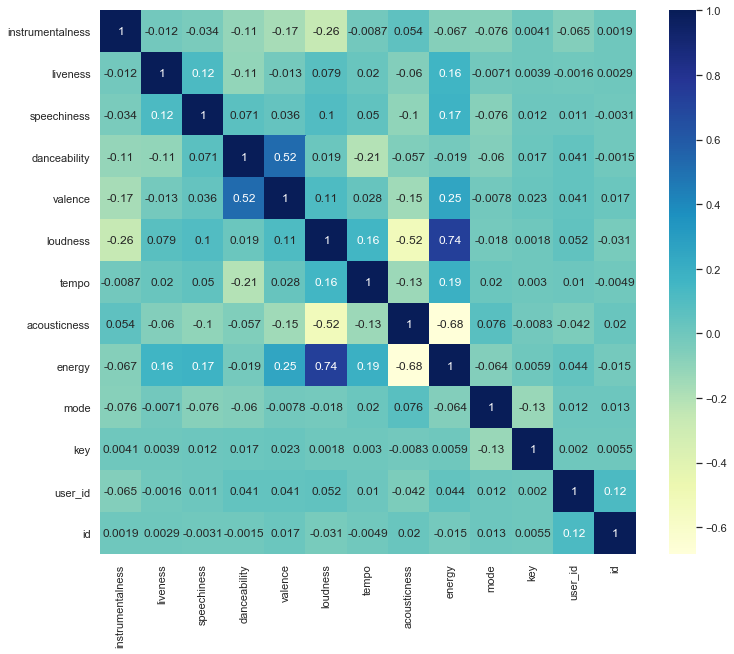

In [50]:
plt.figure(figsize=(12, 10))
cont_plot = sns.heatmap(cont_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of cont_df</i></center>

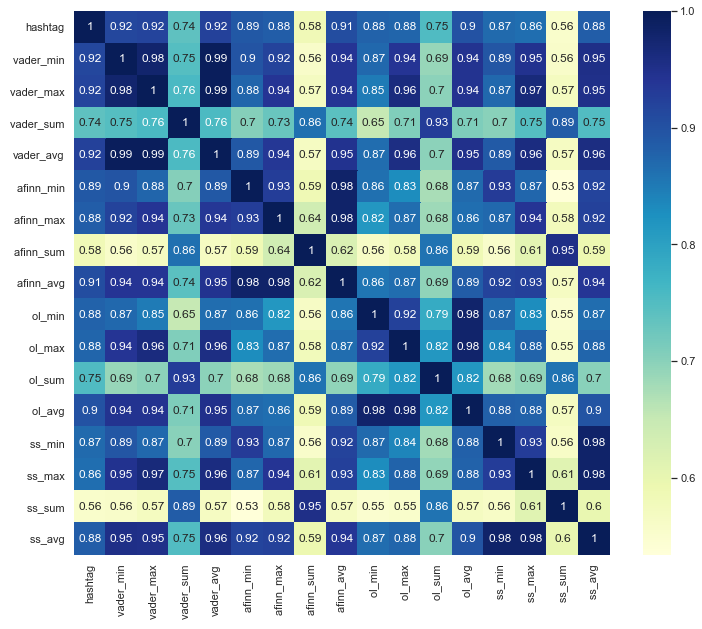

In [51]:
plt.figure(figsize=(12, 10))
sent_plot = sns.heatmap(sent_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of sent_df</i></center>

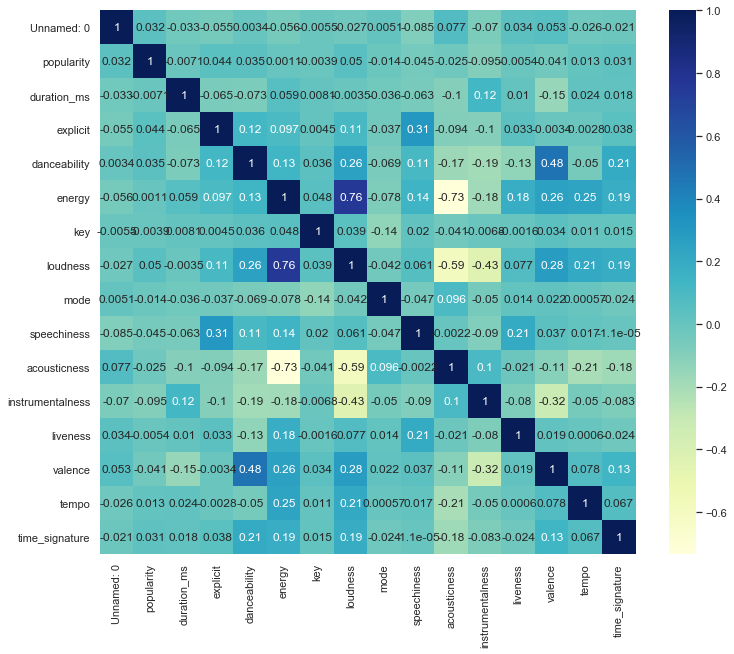

In [53]:
plt.figure(figsize=(12, 10))
tracks_plot = sns.heatmap(tracks_df.corr(), cmap="YlGnBu", annot=True)

<center><i>Correlation heatmap of cont_df</i></center>

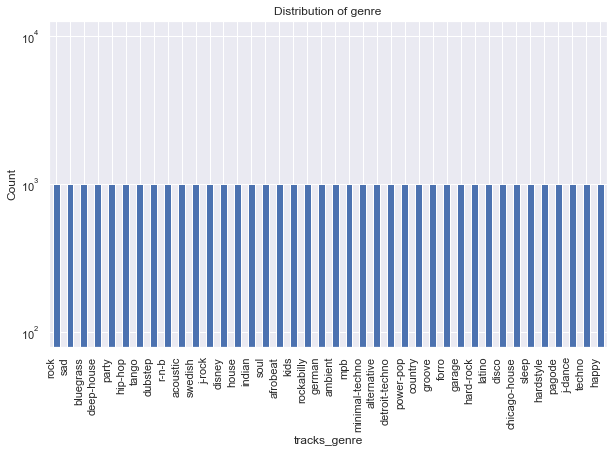

In [59]:
track_genre_counts= tracks_df['track_genre'].value_counts()
plt.figure(figsize=(10,6))
top_genre= track_genre_counts.nlargest(40)
top_genre.plot(kind='bar')
plt.yscale('log')
plt.title('Distribution of genre')
plt.xlabel('tracks_genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show();

In [65]:
names = tracks_df["track_genre"].value_counts(dropna=False).keys().tolist()
counts = tracks_df["track_genre"].value_counts(dropna=False).tolist()

results = []

for name, count in zip(names, counts):
    results.append({"name": name, "count": count})

results
#114 genre

[{'name': 'rock', 'count': 1000},
 {'name': 'sad', 'count': 1000},
 {'name': 'bluegrass', 'count': 1000},
 {'name': 'deep-house', 'count': 1000},
 {'name': 'party', 'count': 1000},
 {'name': 'hip-hop', 'count': 1000},
 {'name': 'tango', 'count': 1000},
 {'name': 'dubstep', 'count': 1000},
 {'name': 'r-n-b', 'count': 1000},
 {'name': 'acoustic', 'count': 1000},
 {'name': 'swedish', 'count': 1000},
 {'name': 'j-rock', 'count': 1000},
 {'name': 'disney', 'count': 1000},
 {'name': 'house', 'count': 1000},
 {'name': 'indian', 'count': 1000},
 {'name': 'soul', 'count': 1000},
 {'name': 'afrobeat', 'count': 1000},
 {'name': 'kids', 'count': 1000},
 {'name': 'rockabilly', 'count': 1000},
 {'name': 'german', 'count': 1000},
 {'name': 'ambient', 'count': 1000},
 {'name': 'mpb', 'count': 1000},
 {'name': 'minimal-techno', 'count': 1000},
 {'name': 'alternative', 'count': 1000},
 {'name': 'detroit-techno', 'count': 1000},
 {'name': 'power-pop', 'count': 1000},
 {'name': 'country', 'count': 1000},


As can be seen, the data is balanced with 1000 entries for each genre.

In [66]:
artist_name = tracks_df["artists"].value_counts(dropna=False).keys().tolist()
artist_count = tracks_df["artists"].value_counts(dropna=False).tolist()
value_dict = dict(zip(artist_name, artist_count))
value_dict

{'The Beatles': 279,
 'George Jones': 271,
 'Stevie Wonder': 236,
 'Linkin Park': 224,
 'Ella Fitzgerald': 222,
 'Prateek Kuhad': 217,
 'Feid': 202,
 'Chuck Berry': 190,
 'Håkan Hellström': 183,
 'OneRepublic': 181,
 'The Beach Boys': 176,
 'my little airport': 171,
 'Charlie Brown Jr.': 169,
 'Elvis Presley': 169,
 'Red Hot Chili Peppers': 159,
 'Bryan Adams': 157,
 'Scooter': 155,
 'Daddy Yankee': 154,
 'Arctic Monkeys': 152,
 'BTS': 151,
 'Norah Jones': 150,
 'The Prophet': 145,
 'Hank Williams': 140,
 'Glee Cast': 139,
 'Don Omar': 137,
 'Vybz Kartel': 128,
 'Los Prisioneros': 126,
 'CoComelon': 122,
 'Anupam Roy': 121,
 'Seiko Matsuda': 118,
 'Burna Boy': 116,
 'Weezer': 111,
 'Dean Martin': 110,
 'Rob Zombie': 106,
 'Germaine Franco': 106,
 'Marilyn Manson': 105,
 'Hank Williams;Drifting Cowboys': 105,
 'J Balvin': 104,
 'Eikichi Yazawa': 103,
 'Nat King Cole': 102,
 'Eason Chan': 101,
 'Almafuerte': 99,
 'Maneva': 94,
 'Little Symphony': 94,
 'Lamb of God': 94,
 'Jay Chou': 93,


The distribution of artists is not balanced; as can be seen, The Beatles have the most number of tracks (279) while other artists may have much less.

In [ ]:
album_name = tracks_df["album_name"].value_counts(dropna=False).keys().tolist()
album_count = tracks_df["album_name"].value_counts(dropna=False).tolist()

album = []

for name, count in zip(album_name, album_count):
    album.append({"artist": album_name, "count": album_count})

album
#46589 albums

In [73]:
tracks_df["album_name"].nunique()

46589

There are 46,589 different instances of album names in the dataset.

In [75]:
for l in cont_df.tweet_lang.unique():
    print(f"{l}")
    print(f"{cont_df[cont_df.tweet_lang == l].lang.value_counts(normalize=True)}")
    print('==========================================')


en
en           7.826219e-01
es           6.724472e-02
ja           3.346372e-02
en-gb        2.843967e-02
nl           2.227875e-02
                 ...     
La Paz       9.608419e-08
Singapore    9.608419e-08
Kuwait       9.608419e-08
Athens       9.608419e-08
nb           9.608419e-08
Name: lang, Length: 85, dtype: float64
et
en                            0.727284
es                            0.069867
en-gb                         0.043072
ja                            0.042503
fr                            0.033922
nl                            0.024614
pt                            0.016944
it                            0.015227
de                            0.010438
id                            0.005832
ru                            0.002636
ar                            0.002215
tr                            0.002093
ko                            0.000639
fi                            0.000552
pl                            0.000385
sv                            0.000315
ca    

Investigating the correlation between tweet_lang and lang from cont_df, we find that these are not the same fields as was initially suspected. We also find that for most values of tweet_lang, a lang value of en is the most dominant. This may give us an indication that there might be some bias in the dataset with regards to Anglophone music. This will need to be investigated.

The lang feature also has cities, dialects, and timezones in it. This will need to be cleaned up before utilizing in a machine learning model.

There are also some bizarre language codes in lang like xx-lc which is apparently the LOLCAT language. Not sure what to do about that one but there is definitely further investigation needed. 

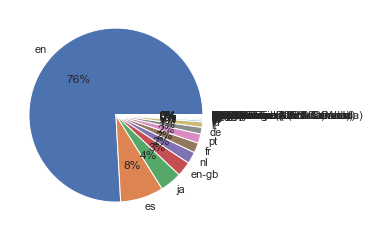

In [50]:
plt.pie(cont_df['lang'].value_counts(), labels = list(cont_df['lang'].value_counts().index),autopct='%.0f%%');

79% of the dataset is English tracks (76% en & 3% en-gb). This is a huge data imbalance and could potentially mean that if ran through a training model, may result in the predictions that are more suited for listeners of English tracks.